In [216]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
import scipy
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning) #remove warning

In [217]:
def load_dataset(path_to_file):
    df=pd.read_csv(path_to_file)
    return df

In [218]:
def standardize(df):
    scaler=StandardScaler()
    df_std=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    df_std[df.columns[-1]]=df[df.columns[-1]]
    return df_std

In [219]:
def train_test(df):
    X=df.drop(df.columns[-1],axis=1)
    y=df[df.columns[-1]]
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)
    return([XTrain,XTest,yTrain,yTest])

In [220]:
def knn_classifier(k,XTrain,yTrain,XTest):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(XTrain, yTrain)
    yPred = knn.predict(XTest)
    return yPred

In [221]:
def percentage_accuracy(yPred,yTest):
    return(accuracy_score(yTest, yPred))

In [222]:
def confusion_matrixp(yPred,yTest):
    return(confusion_matrix(yTest,yPred))

In [223]:
def naive_bayes_classifier(XTrain,yTrain,XTest):
    gnb = GaussianNB()
    gnb.fit(XTrain, yTrain)
    yPred = gnb.predict(XTest)
    return yPred

In [224]:
def pca(df,n):
    x=df.drop(df.columns[-1],axis=1)
    pca = PCA(n_components=n)
    pComps = pca.fit_transform(x)
    pDf = pd.DataFrame(data = pComps)
    pDf[df.columns[-1]]=df[df.columns[-1]]
    return pDf

In [225]:
def bayes(X,y,yName):
     XTrain, XTest, YTrain, YTest =train_test_split(X,y, test_size=0.3, random_state=42,shuffle=True)
     XTrain0=XTrain[XTrain[yName] == 0]
     XTrain1=XTrain[XTrain[yName] == 1]
     meanXTrain0=XTrain0.mean(axis = 0)
     meanXTrain1=XTrain1.mean(axis = 0)
     covXTrain0=XTrain0.cov()
     covXTrain1=XTrain1.cov()
     YPred=[]
     for i in range(len(XTest)):
         p1=multivariate_normal.pdf(XTest.iloc[i], mean=meanXTrain1,cov= covXTrain1,allow_singular=True)
         p0=multivariate_normal.pdf(XTest.iloc[i], mean=meanXTrain0,cov= covXTrain0,allow_singular=True)
         if(p1>p0):
             YPred.append(1)
         else:
             YPred.append(0)
     return YPred

In [226]:
def responsibily(x, w, mean, cov):
    r = 0
    for i in range(len(w)):
        r += w[i] * scipy.stats.multivariate_normal.pdf(x, mean[i], cov[i], allow_singular=True)
    return r

K =  1
[[110   1]
 [  1  63]]
0.9885714285714285 

K =  3
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  5
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  7
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  9
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  11
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  13
[[110   1]
 [  2  62]]
0.9828571428571429 

K =  15
[[110   1]
 [  3  61]]
0.9771428571428571 

K =  17
[[109   2]
 [  2  62]]
0.9771428571428571 

K =  19
[[107   4]
 [  2  62]]
0.9657142857142857 

K =  21
[[105   6]
 [  2  62]]
0.9542857142857143 

Confusion Matrix by KNN Classifier: 
 [[109.18181818   1.81818182]
 [  2.18181818  61.81818182]] 

Accuracy by KNN Classifier: 0.9771428571428572


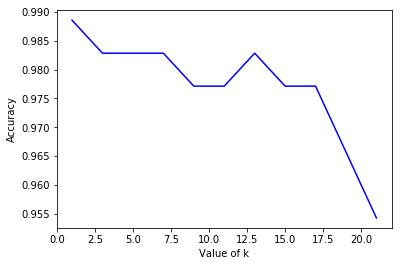

In [227]:
#knn

df=load_dataset("../inLab/SteelPlateFaults-2class.csv")

dfStd=standardize(df)
XTrain=train_test(dfStd)[0]
XTest=train_test(dfStd)[1]
yTrain=train_test(dfStd)[2]
yTest=train_test(dfStd)[3]
X = df
y = df['Z_Scratch']
yTest = train_test(df)[3]

k = range(1,22,2)
accuracies=[]
confusion=[]
for i in k:
    print("K = ",i)
    yPredKnn=knn_classifier(i,XTrain,yTrain,XTest)
    print(confusion_matrixp(yPredKnn,yTest))
    confusion.append(confusion_matrixp(yPredKnn,yTest))
    print(percentage_accuracy(yPredKnn,yTest),"\n")
    accuracies.append(percentage_accuracy(yPredKnn,yTest))

print("Confusion Matrix by KNN Classifier: \n",sum(confusion)/len(confusion),"\n")
print("Accuracy by KNN Classifier:",sum(accuracies)/len(accuracies))
plt.plot(range(1,22,2),accuracies,color='b')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.show()

VALUE OF N:  1 

K =  1
[[80 31]
 [52 12]]
0.5257142857142857 

K =  3
[[91 20]
 [47 17]]
0.6171428571428571 

K =  5
[[100  11]
 [ 51  13]]
0.6457142857142857 

K =  7
[[101  10]
 [ 50  14]]
0.6571428571428571 

K =  9
[[105   6]
 [ 51  13]]
0.6742857142857143 

K =  11
[[104   7]
 [ 51  13]]
0.6685714285714286 

K =  13
[[106   5]
 [ 51  13]]
0.68 

K =  15
[[105   6]
 [ 51  13]]
0.6742857142857143 

K =  17
[[105   6]
 [ 53  11]]
0.6628571428571428 

K =  19
[[107   4]
 [ 56   8]]
0.6571428571428571 

K =  21
[[107   4]
 [ 54  10]]
0.6685714285714286 

Confusion Matrix by KNN Classifier: 
 [[101.          10.        ]
 [ 51.54545455  12.45454545]] 

Accuracy by KNN Classifier: 0.6483116883116883


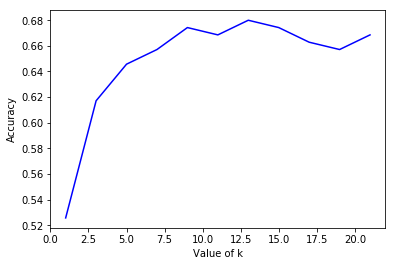

##############################

VALUE OF N:  2 

K =  1
[[97 14]
 [ 9 55]]
0.8685714285714285 

K =  3
[[97 14]
 [10 54]]
0.8628571428571429 

K =  5
[[100  11]
 [  9  55]]
0.8857142857142857 

K =  7
[[98 13]
 [ 9 55]]
0.8742857142857143 

K =  9
[[96 15]
 [ 6 58]]
0.88 

K =  11
[[96 15]
 [ 8 56]]
0.8685714285714285 

K =  13
[[96 15]
 [ 8 56]]
0.8685714285714285 

K =  15
[[96 15]
 [ 6 58]]
0.88 

K =  17
[[94 17]
 [ 6 58]]
0.8685714285714285 

K =  19
[[94 17]
 [ 6 58]]
0.8685714285714285 

K =  21
[[94 17]
 [ 6 58]]
0.8685714285714285 

Confusion Matrix by KNN Classifier: 
 [[96.18181818 14.81818182]
 [ 7.54545455 56.45454545]] 

Accuracy by KNN Classifier: 0.8722077922077921


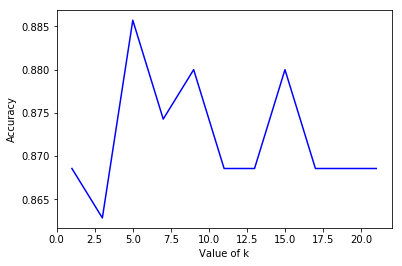

##############################

VALUE OF N:  3 

K =  1
[[101  10]
 [ 11  53]]
0.88 

K =  3
[[104   7]
 [  8  56]]
0.9142857142857143 

K =  5
[[101  10]
 [  9  55]]
0.8914285714285715 

K =  7
[[98 13]
 [ 8 56]]
0.88 

K =  9
[[98 13]
 [11 53]]
0.8628571428571429 

K =  11
[[98 13]
 [ 9 55]]
0.8742857142857143 

K =  13
[[97 14]
 [ 6 58]]
0.8857142857142857 

K =  15
[[96 15]
 [ 6 58]]
0.88 

K =  17
[[95 16]
 [ 5 59]]
0.88 

K =  19
[[94 17]
 [ 6 58]]
0.8685714285714285 

K =  21
[[94 17]
 [ 6 58]]
0.8685714285714285 

Confusion Matrix by KNN Classifier: 
 [[97.81818182 13.18181818]
 [ 7.72727273 56.27272727]] 

Accuracy by KNN Classifier: 0.8805194805194805


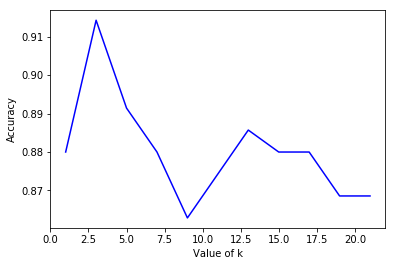

##############################



In [228]:
#pca then knn

#l=[i for i in range(1,len(df.columns))]
l=[1,2,3]

for i in l:
    print("VALUE OF N: ",i,"\n")
    pdf = pca(df,i)
    #print(pdf.head())
    
    dfStd=standardize(pdf)
    XTrain=train_test(dfStd)[0]
    XTest=train_test(dfStd)[1]
    yTrain=train_test(dfStd)[2]
    yTest=train_test(dfStd)[3]
    X = df
    y = df['Z_Scratch']
    yTest = train_test(df)[3]

    k = range(1,22,2)
    accuracies=[]
    confusion=[]
    for i in k:
        print("K = ",i)
        yPredKnn=knn_classifier(i,XTrain,yTrain,XTest)
        print(confusion_matrixp(yPredKnn,yTest))
        confusion.append(confusion_matrixp(yPredKnn,yTest))
        print(percentage_accuracy(yPredKnn,yTest),"\n")
        accuracies.append(percentage_accuracy(yPredKnn,yTest))
    #yPredBayes = bayes(X,y)
    print("Confusion Matrix by KNN Classifier: \n",sum(confusion)/len(confusion),"\n")
    #print("Confusion Matrix by Bayes Classifier: \n",confusion_matrixp(yPredBayes,yTest),"\n")
    print("Accuracy by KNN Classifier:",sum(accuracies)/len(accuracies))
    #print("Accuracy by Bayes Classifier :",percentage_accuracy(yPredBayes,yTest))
    plt.plot(range(1,22,2),accuracies,color='b')
    plt.xlabel("Value of k")
    plt.ylabel("Accuracy")
    plt.show()
    print("##############################\n")

In [229]:
def bayesGMM(k,df):
    df_0 = df[df['Z_Scratch']==0]
    df_1 = df[df['Z_Scratch']==1]
    X_train0, X_test0, y_train0, y_test0 = train_test_data(df_0)
    X_train1, X_test1, y_train1, y_test1 = train_test_data(df_1)

    XTest = np.concatenate((X_test0, X_test1))
    yTest = np.concatenate((y_test0, y_test1))

    gmm = GaussianMixture(n_components=k,reg_covar=1e-4)
    gmm.fit(X_train0)

    gmm2 = GaussianMixture(n_components=k,reg_covar=1e-4)
    gmm2.fit(X_train1)
    
    yPred = []
    for i in XTest:
        res0 = res(i, gmm.weights_, gmm.means_, gmm.covariances_)
        res1 = res(i, gmm2.weights_, gmm2.means_, gmm2.covariances_)
        if res0>res1:
            yPred.append(0)
        else:
            yPred.append(1)
    print("Accuracy for GMM  Bayes Classifier, k = : ",k)
    print(percentage_accuracy(yPred, yTest))
    print(confusion_matrixp(yPred, yTest))
    print()

In [230]:
#GMM

df=load_dataset("../inLab/SteelPlateFaults-2class.csv")

dfX_test,dfX_train,dfY_test,dfY_train=train_test_data(df)

dfh= pd.concat([dfX_train,dfY_train], axis=1)
dft= pd.concat([dfX_test,dfY_test],axis=1)

ls = [2,4,8,16]
for k in ls:
    bayesGMM(k,df)

Accuracy for GMM  Bayes Classifier, k = :  2
0.8694581280788177
[[230  43]
 [ 10 123]]

Accuracy for GMM  Bayes Classifier, k = :  4
0.8669950738916257
[[253  20]
 [ 34  99]]

Accuracy for GMM  Bayes Classifier, k = :  8
0.3645320197044335
[[ 15 258]
 [  0 133]]

Accuracy for GMM  Bayes Classifier, k = :  16
0.5640394088669951
[[153 120]
 [ 57  76]]



In [214]:
#pca then gmm

df=load_dataset("../inLab/SteelPlateFaults-2class.csv")

#l=[i for i in range(1,len(df.columns))]
l=[1,2,3]

for i in l:
    print("VALUE OF N: ",i,"\n")
    pdf = pca(df,i)

    dfX_test,dfX_train,dfY_test,dfY_train=train_test_data(df)

    dfh= pd.concat([dfX_train,dfY_train], axis=1)
    dft= pd.concat([dfX_test,dfY_test],axis=1)

    ls = [2,4,8,16]
    for k in ls:
        bayesGMM(k,df)
    print("##############################\n")

VALUE OF N:  1 

Accuracy for GMM  Bayes Classifier, k = :  2
0.8694581280788177
[[230  43]
 [ 10 123]]

Accuracy for GMM  Bayes Classifier, k = :  4
0.8374384236453202
[[251  22]
 [ 44  89]]

Accuracy for GMM  Bayes Classifier, k = :  8
0.6699507389162561
[[272   1]
 [133   0]]

Accuracy for GMM  Bayes Classifier, k = :  16
0.5812807881773399
[[157 116]
 [ 54  79]]

##############################

VALUE OF N:  2 

Accuracy for GMM  Bayes Classifier, k = :  2
0.8694581280788177
[[230  43]
 [ 10 123]]

Accuracy for GMM  Bayes Classifier, k = :  4
0.8669950738916257
[[253  20]
 [ 34  99]]

Accuracy for GMM  Bayes Classifier, k = :  8
0.8891625615763546
[[253  20]
 [ 25 108]]

Accuracy for GMM  Bayes Classifier, k = :  16
0.5517241379310345
[[149 124]
 [ 58  75]]

##############################

VALUE OF N:  3 

Accuracy for GMM  Bayes Classifier, k = :  2
0.8694581280788177
[[230  43]
 [ 10 123]]

Accuracy for GMM  Bayes Classifier, k = :  4
0.8694581280788177
[[259  14]
 [ 39  94]]

Acc